<a href="https://colab.research.google.com/github/adrincont/Proyecto-IA-PLN/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración de bases de datos**
---

In [ ]:
pip install pyyaml==5.4.1

In [ ]:
pip install plotly_express

In [ ]:
# Librerias basicas
import pandas as pd
import numpy as np
# Para graficos
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Tratamiento del texto
import string
import nltk
nltk.download("popular") 
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

## 1. Lectura de los datos

In [ ]:
url = 'https://raw.githubusercontent.com/andreamorgar/poesIA/master/data/poems.csv'
poems_df = pd.read_csv(url)
poems_df

## 2. Estructura de los datos

In [127]:
print(poems_df['content'][0])



En el parque confuso
Que con lánguidas brisas el cielo sahúma,
El ciprés, como un huso,
Devana un ovillo de de bruma.
El telar de la luna tiende en plata su urdimbre;
Abandona la rada un lúgubre corsario,
Y después suena un timbre
En el vecindario.

Sobre el horizonte malva
De una mar argentina,
En curva de frente calva
La luna se inclina,
O bien un vago nácar disemina
Como la valva
De una madreperla a flor del agua marina.

Un brillo de lóbrego frasco
Adquiere cada ola,
Y la noche cual enorme peñasco
Va quedándose inmensamente sola.

Forma el tic-tac de un reloj accesorio,
La tela de la vida, cual siniestro pespunte.
Flota en la noche de blancor mortuorio
Una benzoica insispidez de sanatorio,
Y cada transeúnte
Parece una silueta del Purgatorio.

Con emoción prosaica,
Suena lejos, en canto de lúgubre alarde,
Una voz de hombre desgraciado, en que arde
El calor negro del rom de Jamaica.
Y reina en el espíritu con subconsciencie arcaica,
El miedo de lo demasiado tarde.

Tras del horizon

In [128]:
poems_df.describe()

,author,content,title
count,5131,5131,5131
unique,267,5128,4842
top,Pablo Neruda,\n\n,Cien sonetos de amor
freq,357,2,100


In [136]:
# Autores de los poemas
authors = poems_df.groupby("author")
authors = authors.size().sort_values(ascending=False).reset_index()
fig = px.bar(authors, x='author', y=0)
fig.show()

In [137]:
# Poner caracter especial al salto de linea y al salto de parrafo
poems_df.content = poems_df.content.str.replace('\n\n',' # ')
poems_df.content = poems_df.content.str.replace('\n',' * ')
# Poner en minuscula
poems_df['content'] = poems_df['content'].apply(lambda x: str(x).lower())
# Muestra del texto
poems_df.content[10]

' # salí, señor don pedro, esta mañana * a ver un toro que en un nacimiento * con mi mula estuviera más contento * que alborotando a córdoba la llana. # romper la tierra he visto en su abesana * mis prójimos con paso menos lento, * que él se entró en la ciudad tan sin aliento, * y aún más, que me dejó en la barbacana. # no desherréis vuestro zagal, que un clavo * no ha de valer la causa, si no miente * quien de la cuerda apela para el rabo. # perdonadme el hablar tan cortésmente * de quien, ya que no alcalde por lo bravo, * podrá ser, por lo manso, presidente.'

In [138]:
# Tokenizar los textos
tokenizer = RegexpTokenizer(r'\w+')
poems_df['token'] = poems_df['content'].apply(lambda x: tokenizer.tokenize(str(x).lower()))
poems_df.token

0       [en, el, parque, confuso, que, con, lánguidas,...
1       [porque, si, tú, no, velas, vendré, como, ladr...
2       [pequeña, de, mis, sueños, por, tu, piel, las,...
3       [los, dedos, de, la, nieve, repiquetearon, en,...
4       [naciste, en, armenia, pero, te, fuiste, a, vi...
                              ...                        
5128    [vienes, me, llega, aquí, pues, que, suspiras,...
5129    [nada, es, memoria, todo, es, invención, lo, q...
5130    [felicidad, muy, dentro, de, tí, serenidad, en...
5131    [mis, manos, abren, las, cortinas, de, tu, ser...
5132    [y, ahora, danos, una, muerte, honorable, viej...
Name: token, Length: 5133, dtype: object

In [139]:
# Cantidad de palabras por poema
poems_df['len_token'] = [len(x) for x in poems_df['token']]
fig = px.histogram(poems_df, x='len_token', marginal="box")
fig.show()

In [140]:
poems_df['len_token'].describe().reset_index().transpose()
# Eliminamos textos con pocas palabras


,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
len_token,5133.0,167.478473,206.68842,0.0,80.0,107.0,185.0,3914.0


In [166]:
poems_df[poems_df.len_token < 10]

,author,content,title,token,len_token
79,Byron Espinoza,persistente * continua tu cue...,Persistente...,"[persistente, continua, tu, cuerpo, su, gotear...",9
673,Nadia Contreras,#,Cuando el cielo se derrumbe (fragmento),[],0
1377,NaN,nan,NaN,[nan],1
1428,Gabriela Mistral,*,La maestra rural,[],0
2534,Bertolt Brecht,"no tenías ninguna, * yo sólo una, * que amaba.",Debilidades,"[no, tenías, ninguna, yo, sólo, una, que, amaba]",8
2773,Byron Espinoza,me someto a tus paredes: * ...,Me someto a tus paredes...,"[me, someto, a, tus, paredes, reviéntame, cont...",8
2859,Blanca Andreu,# entre tú y yo no hay ningún no.,ENTRE TÚ Y YO,"[entre, tú, y, yo, no, hay, ningún, no]",8
2978,Byron Espinoza,incansable * remuevo las aren...,Incansable...,"[incansable, remuevo, las, arenas, de, tu, cue...",7
3040,Antonio Fernández Lera,párteme por la mitad: * rómpeme * y olvídame,El eco de tu voz: 3,"[párteme, por, la, mitad, rómpeme, y, olvídame]",7
3259,Juan Ramón Jiménez,# sólo eres tú * (aquella tú) * cuando me hie...,ROSA,"[sólo, eres, tú, aquella, tú, cuando, me, hieres]",8


In [134]:
# Cantidad de estrofas por poemas
text_estrofa = [x.split("#") for x in poems_df['content']]
len_estrofas = pd.Series(list(map(len,text_estrofa))).reset_index()
fig = px.histogram(len_estrofas, x=0, marginal="box", hover_data=len_estrofas.columns)
fig.show()

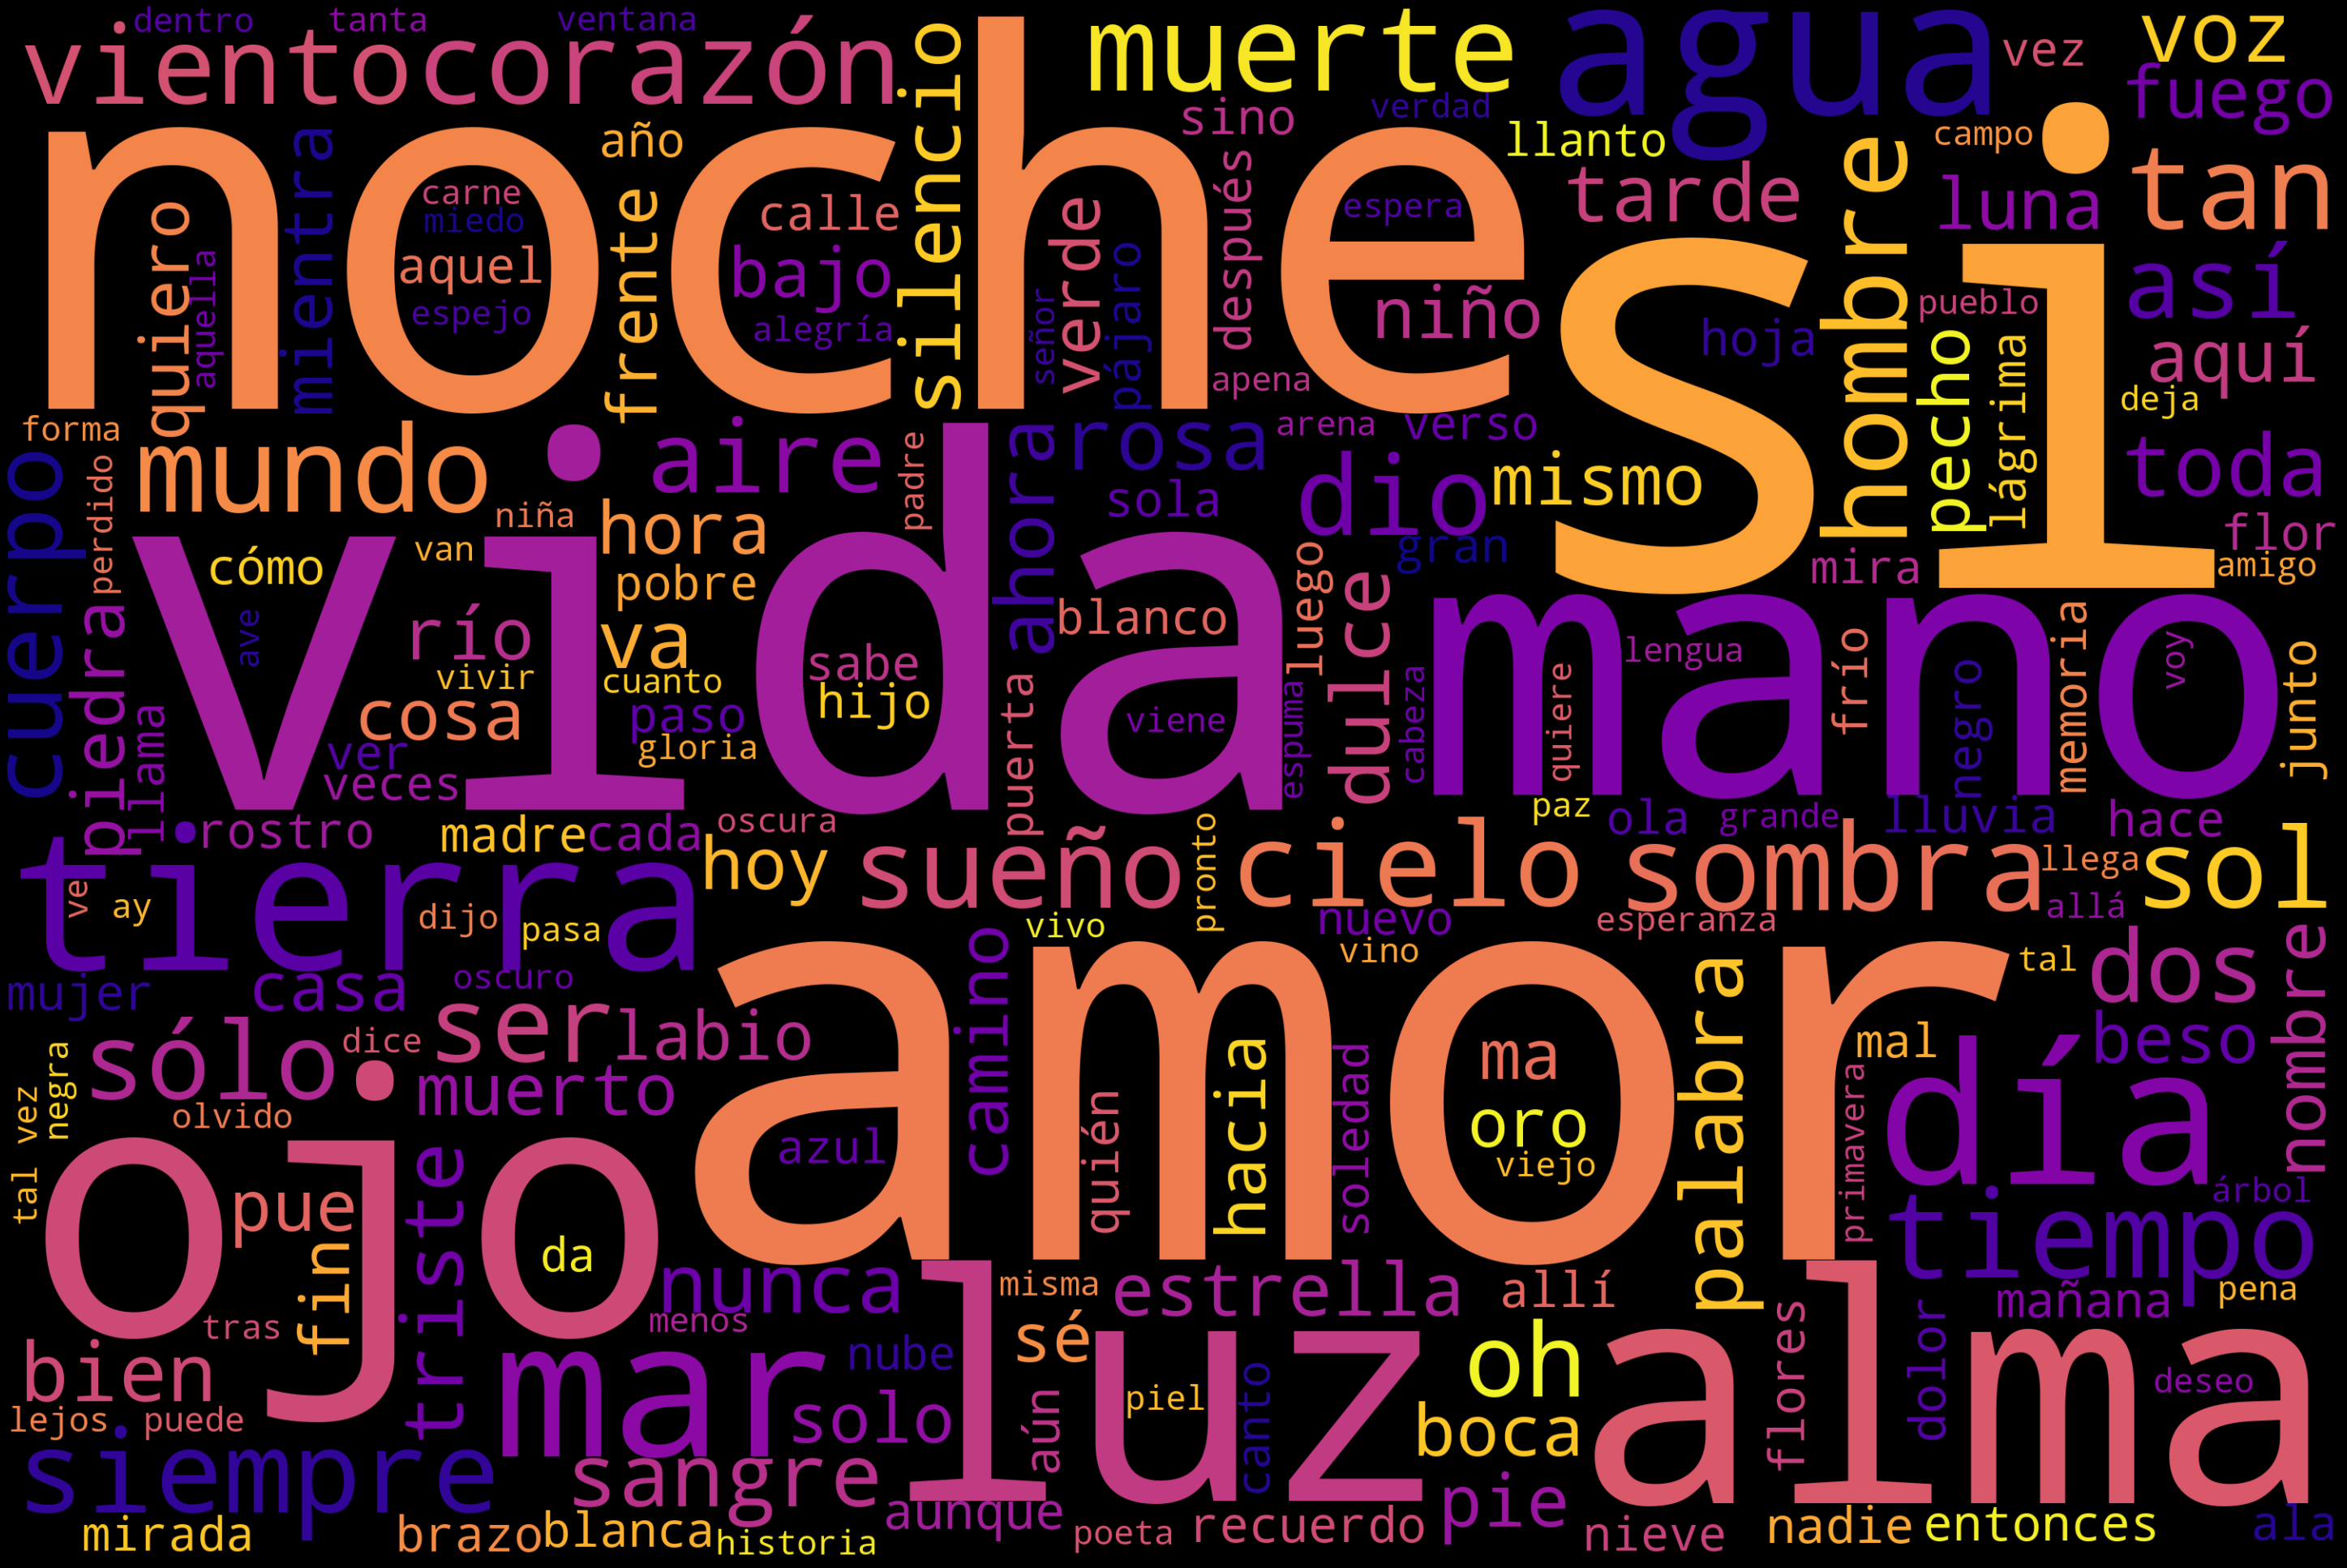

In [192]:
# Nube de palabras 
stop_words_sp = set(stopwords.words('spanish'))
def remove_stopwords(text):
  res = [word for word in text if word not in stop_words_sp]
  return res
poems_df['token'] = poems_df['token'].apply(lambda x: remove_stopwords(x))

text_poemas = list(poems_df.token)
text_poemas = [j for i in text_poemas for j in i]
text_poemas = " ".join(text_poemas)
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    colormap = 'plasma',
    background_color = 'black').generate(text_poemas)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [202]:
# Palabras mas frecuentes
text_poemas = list(poems_df.token)
text_poemas = [j for i in text_poemas for j in i]
text_poemas = pd.Series(text_poemas).value_counts().reset_index()[:100]
fig = px.bar(text_poemas, x='index', y=0)
fig.show()